In [3]:
#Transformaciones 
import pandas as pd
ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\d1_bank_1.csv"
trans = pd.read_csv(ruta)
trans[trans["age"]<18]

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,1182,0,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,1411,0,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,4020,0,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,5681,0,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,6764,0,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,8420,0,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,9471,0,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,9553,0,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,9752,0,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,10679,0,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


In [2]:
def clase_edad(x):
    if x < 18:
        return "unknown"
    elif x >= 18 and x <=24: 
        return '18-24'
    elif  x >= 25 and x <= 34:
        return '25-34'
    elif  x >= 35 and x <= 44:
        return '35-44'
    elif  x >= 45 and x <= 54:
        return '45-54'
    elif  x >= 55 and x <= 64:
        return '55-64'
    else:
        return '65+' #Como no hay edades inferiores a 18 no va dar problemae

trans['Clase de edad'] = trans['age'].apply(clase_edad)
trans # Para visualizar la tabla generada


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Clase de edad
0,1,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,55-64
1,2,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,55-64
2,3,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,35-44
3,4,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,55-64
4,5,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,45-54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,11158,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no,25-34
11158,11159,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no,35-44
11159,11160,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no,25-34
11160,11161,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no,35-44


In [8]:
trans.to_csv(r"C:\Users\favil\ProjecteData\Equip_16\Data\t_perfil_cliente.csv", index=False)

In [ ]:
#py -3.13 -m pip install KModes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 43230.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41722.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 40360.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1165, cost: 37654.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/1

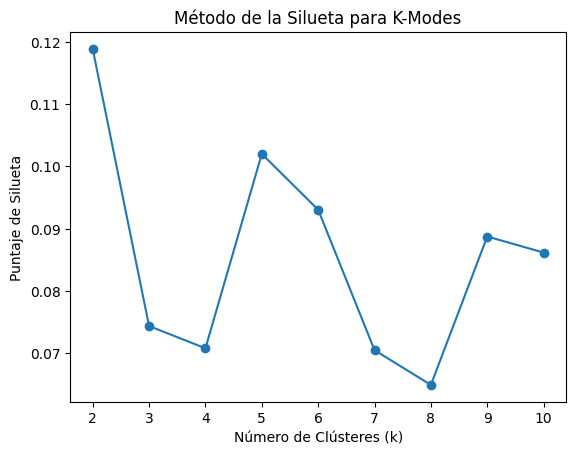

In [8]:
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
import pandas as pd
import matplotlib.pyplot as plt

ruta = r"C:\Users\favil\ProjecteData\Equip_16\Data\d1_bank_1.csv"
trans = pd.read_csv(ruta)
trans = trans[["id","age","job","marital","education","housing","loan"]]

# Convertir las columnas categóricas a categorías numéricas usando pd.get_dummies
df_encoded = pd.get_dummies(trans)

# Probar diferentes valores de k (número de clusters)
silhouette_scores = []

for k in range(2, 11):  # Para que funcione, k debe ser al menos 2
    kmeans = KModes(n_clusters=k, init='Cao', n_init=10, verbose=1)
    clusters = kmeans.fit_predict(trans)
    
    # Calcular el puntaje de la silueta con la métrica de Hamming
    score = silhouette_score(df_encoded, clusters, metric='hamming')
    silhouette_scores.append(score)

# Graficar la silueta
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Método de la Silueta para K-Modes')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Puntaje de Silueta')
plt.show()

In [13]:
import pandas as pd
from kmodes.kmodes import KModes



# Convertir las columnas a tipo categórico (si aún no lo son)
for col in trans.columns:
    trans[col] = trans[col].astype('category')

# Inicializar el modelo K-Modes
kmeans = KModes(n_clusters=6, init='Cao', n_init=10, verbose=1)

# Aplicar el K-Modes al dataframe
clusters = kmeans.fit_predict(trans)

# Mostrar el dataframe con los clusters asignados
trans['Cluster'] = clusters

# Ver los resultados
print(trans)

# Ver los centroides de los clusters
print("Centroides de los clusters: ")
print(kmeans.cluster_centroids_)

trans["Cluster"].value_counts()

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1230, cost: 37382.0
Run 1, iteration: 2/100, moves: 295, cost: 37341.0
Run 1, iteration: 3/100, moves: 605, cost: 36757.0
Run 1, iteration: 4/100, moves: 49, cost: 36757.0
          id age          job  marital  education housing loan  Cluster
0          1  59       admin.  married  secondary     yes   no        3
1          2  56       admin.  married  secondary      no   no        0
2          3  41   technician  married  secondary     yes   no        2
3          4  55     services  married  secondary     yes   no        2
4          5  54       admin.  married   tertiary      no   no        0
...      ...  ..          ...      ...        ...     ...  ...      ...
11157  11158  33  blue-collar   single    primary     yes   no        1
11158  11159  39     services  married  secondary      no   no  

Cluster
0    3404
1    2940
2    2121
4    1210
5     910
3     577
Name: count, dtype: int64